In [10]:
# import random
# # while(1):
# #     a = random.randint(0,100000)
# #     b = random.randint(0,100000)
# #     Myfuncs(a,b)

# Myfuncs(0,80000)
        

131072   1


IndexError: list index out of range

In [1]:
print("DFD")

DFD


In [8]:
def Myfuncs(a, b):

    n, k = a,b

    visited = list()
    to_go = list()
    distances = [-1 for _ in range(100001)]
    distances[n] = 0
    to_go.append(n)

    while to_go is not None:
        now = to_go.pop(0)
        visited.append(now)
        anchor = abs(now - k)

    #    print("visited :", visited)

        mult = now*2
        if k == mult:
            print(distances[now])
            break

        while anchor > abs(mult-k):
            if mult in visited:
                break
            if mult in to_go:
                break
            to_go.append(mult)
            try:
                distances[mult] = distances[now]
            except:
                print(mult, " ", now)
            mult *= 2
            if k == mult:
                print(distances[now])
                break

        if k == mult:
                break

        a_second_later = [now-1, now+1]

        if k in a_second_later:
            print(distances[now]+1)
            break

        if a_second_later not in visited:
            if a_second_later not in to_go:
                to_go += a_second_later
                distances[now-1] = distances[now]+1
                distances[now+1] = distances[now]+1

    #    print("to_go :", to_go)

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

# 이미지 가져오기

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=32)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
#imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
#print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
import torch.nn.functional as F
import torch.nn as nn


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 9, 5)
        self.conv3 = nn.Conv2d(9, 12, 5)
        self.conv4 = nn.Conv2d(12, 16, 5)
        self.conv5 = nn.Conv2d(16, 16, 5)
        self.fc0 = nn.Linear(16*6*6, 16*3*3)
        self.fc1 = nn.Linear(16 * 3 * 3, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc2_1 = nn.Linear(84, 60)
        self.fc2_2 = nn.Linear(60, 35)
        self.fc3 = nn.Linear(35, 10)

    def forward(self, x):
      #  print(x.size())

        x = (F.relu(self.conv1(x)))
        x = (F.relu(self.conv2(x)))
        x = (F.relu(self.conv3(x)))
        x = (F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
       # print(x.size())
        x = x.view(-1, 16 * 6 * 6) #2304
        x = F.relu(self.fc0(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc2_1(x))
        x = F.relu(self.fc2_2(x))
        x = self.fc3(x)
        return x
import torchvision.models as models

net = models.resnet50(pretrained=True)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/20143086/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:03<00:00, 26.7MB/s]


In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 신경망 학습하기

In [6]:
import torchvision.models as models

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# CUDA 기기가 존재한다면, 아래 코드가 CUDA 장치를 출력합니다:

print(device)

#model = models.resnet34(pretrained=True)

if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
  net = nn.DataParallel(net)
  

#model.to(device)
net.to(device)
#inputs, labels = data[0].to(device), data[1].to(device)

cuda:0
Let's use 2 GPUs!


DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
      

In [7]:
for epoch in range(10):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data[0].to(device), data[1].to(device)
        
        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 100 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.006
[1,   101] loss: 0.167
[1,   201] loss: 0.085
[1,   301] loss: 0.077
[1,   401] loss: 0.073
[1,   501] loss: 0.068
[1,   601] loss: 0.065
[1,   701] loss: 0.060
[1,   801] loss: 0.060
[1,   901] loss: 0.053
[1,  1001] loss: 0.054
[1,  1101] loss: 0.051
[1,  1201] loss: 0.050
[1,  1301] loss: 0.046
[1,  1401] loss: 0.046
[1,  1501] loss: 0.043
[2,     1] loss: 0.000
[2,   101] loss: 0.040
[2,   201] loss: 0.038
[2,   301] loss: 0.040
[2,   401] loss: 0.038
[2,   501] loss: 0.040
[2,   601] loss: 0.042
[2,   701] loss: 0.038
[2,   801] loss: 0.038
[2,   901] loss: 0.037
[2,  1001] loss: 0.037
[2,  1101] loss: 0.036
[2,  1201] loss: 0.036
[2,  1301] loss: 0.035
[2,  1401] loss: 0.036
[2,  1501] loss: 0.034
[3,     1] loss: 0.000
[3,   101] loss: 0.028
[3,   201] loss: 0.028
[3,   301] loss: 0.028
[3,   401] loss: 0.027
[3,   501] loss: 0.028
[3,   601] loss: 0.028
[3,   701] loss: 0.028
[3,   801] loss: 0.028
[3,   901] loss: 0.031
[3,  1001] loss: 0.031
[3,  1101] 

In [8]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

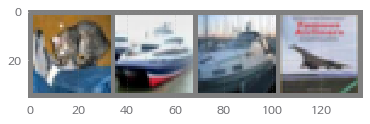

GroundTruth:    cat  ship  ship plane


In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
# net = models.resnet34(pretrained=True)
# net.load_state_dict(torch.load(PATH))

In [11]:
outputs = net(images)

In [12]:
outputs

tensor([[13.5685, 10.8643, 19.9458,  ...,  1.1007, -1.2755, -0.4527],
        [15.6226, 13.5885, 12.7185,  ..., -0.7971,  2.4504,  0.8813],
        [11.9353, 17.3962, 11.5881,  ..., -2.7353,  2.0337,  2.3242],
        [14.4215,  8.0522, 18.5371,  ...,  1.0842, -0.4725, -0.6197]],
       device='cuda:0', grad_fn=<GatherBackward>)

In [13]:
_, predicted = torch.max(outputs, 1)
print(predicted)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

tensor([3, 8, 9, 2], device='cuda:0')
Predicted:    cat  ship truck  bird


In [14]:
correct = 0
total = torch.tensor([0])
labels = labels.to(device)
predicted = predicted.to(device)
# print(correct)
# print(predicted)
# print(labels)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        labels = labels.to(device)
#         print(predicted)
#         print(labels)
#         print(correct)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 51 %


In [15]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        labels = labels.to(device)

        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 56 %
Accuracy of   car : 44 %
Accuracy of  bird : 50 %
Accuracy of   cat : 42 %
Accuracy of  deer : 44 %
Accuracy of   dog : 40 %
Accuracy of  frog : 55 %
Accuracy of horse : 46 %
Accuracy of  ship : 66 %
Accuracy of truck : 70 %


In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# CUDA 기기가 존재한다면, 아래 코드가 CUDA 장치를 출력합니다:

print(device)

cuda:0
